# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science

## Lab 10:  Neural Networks using `keras` 

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas and Kevin Rader<br/>
**Lab Instructor:** Eleni Kaxiras<br/>
**Authors:** David Sondak, Eleni Kaxiras, and Pavlos Protopapas

In [9]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get\
    ("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [10]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Anatomy of an Artificial Neural Network

In a previous lab we created our own neural network by writing some simple python functions.  We focused on a regression problem where we tried to learn a function. We practiced using the logistic activation function in a network with multiple nodes, but a single or two hidden layers.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths. 

### The 3 parts of an ANN

- **Part 1: the input layer** (dimentions are determined from our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

### A word about .npy files

Numpy arrays are faster than plain python lists, as we know. Numpy also offers a file format called .npy, which, when it comes to reading the same data multiple times from disk storage, is a lot faster than reading from a csv file. You can save any list or array into this format.

In [3]:
np.save('/tmp/123', np.array([[1, 2, 3], [4, 5, 6]]))
hello = np.load('/tmp/123.npy')

In [4]:
hello

array([[1, 2, 3],
       [4, 5, 6]])

## `Keras` Basics ![](figs/keras.png)
https://keras.io/

Machine learning computations can be quite demanding. TensorFlow is a framework for representing complicated ML algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[`keras`](https://keras.io/)**, is a high-level API used for fast prototyping, advanced research, and production. We will use `tf.keras` which is TensorFlow's implementation of the `keras` API.

### Models are assemblies of layers

The core data structure of Keras is a **model**, a way to organize layers. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

The simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, one can use the Keras **Functional** API, which allows to build arbitrary graphs of layers.

https://keras.io/models/model/

Everything you need to know about the Sequential model is here: https://keras.io/models/sequential/

### Keras Installation

If you haven't already, install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

### Example: Approximating a Gaussian using keras
Let's try to redo the problem from last week.  Recall that we had a function

$$
\begin{aligned}
f\left(x\right) = e^{-x^{2}}
\end{aligned}
$$

and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [12]:
# Checking if our machine has GPUs. Mine does not..
with tf.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 6284117373824002560)]


Before we get started, we need to create some **data**.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [13]:
from sklearn.model_selection import train_test_split

n_samples = 1050 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's plot the data

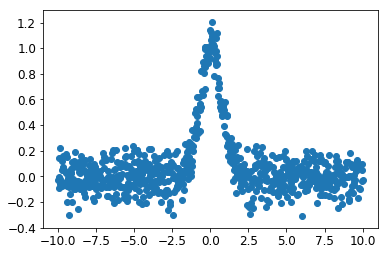

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

### Building a keras network

Now we will create a neural network model with keras. We're going to use a single layer and just 2 neurons in that layer. We will start with the sigmoid activation function. We also choose a linear output layer since we are doing regression. The loss function is selected to be the **mean squared error (MSE)**. In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function. The keras interface has many choises as to those hyperparameters.

**Part 1:** First we start by defining the number of nodes in a layer and the input dimensions. If we have more than one layer we might need to define a value for the number of nodes (H) for each layer.

`H = 
input_dim =`

Then we instantiate the model

`model = models.Sequential() `

**Part 2:** Then we add the hidden layers. Adding layers and stacking them is done using `.add()`

`model.add(layers.Dense(H, input_dim=input_dim,  
                activation='sigmoid')) `

**An alternative way** 

`model = Sequential([
    Dense(200, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(4, activation='linear')
])`

**Part 3:** We end with the final layer (output)

`model.add(layers.Dense(1, 
                activation='linear')) `
                
Our model is not ready yet. We need to configure its learning process with .compile():

`model.compile(loss='mean_squared_error', optimizer='sgd')`

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code)

`model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01))`
              
Our model is now ready to use. We haven't trained it yet, but we'll do that now using the fit method. Notice that we also need to specify the batch size for the stochastic gradient decent algorithm as well as the number of epochs to run.

`model.fit(X_train, Y_train, batch_size=100, epochs=100)#, verbose=1)`

<div class="exercise"><b>Exercise 1:</b> </div>

Build a NN with one hidden layer with **2 neurons**. Use the `tanh` activation function. Train the model using the X_train dataset from above (train the model in this case means run `.compile` and `.fit`).

In [ ]:
# your code here


In [ ]:
# %load solutions/NN_1_layer_2_nodes.py
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# our first hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                activation='tanh')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=100, verbose=1)


Great!  We've trained a model.  Now it's time to explore the results.  Notice the loss function.

In [ ]:
# Some constants for our plots
FIG_SIZE = (10,5)
FONT_SIZE = 10
LABEL_SIZE = 15

In [ ]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model.predict(X_range)

In [ ]:
# Plot the results
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'MLP with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 2:</b></div>

Change the number of neurons in the layer. Try changing the activation function to `reLU`.  Can you get better results?  What worked the best?

In [ ]:
# your code here


In [ ]:
# %load solutions/NN_1_layer_16_nodes.py

H = 40 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model2 = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='relu')) 
# layer 1
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model2.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model2_history = model2.fit(X_train, Y_train, batch_size=256, epochs=1200, verbose=1, \
                          shuffle = True, validation_split=0.5)


Is the loss smaller now? You may access the results in a model by its `.history`

In [ ]:
model2_history.history['loss'][-1]

Again let's use the new model to predict:

In [ ]:
# use our model to predict in the range we want
X_range = np.linspace(-10, 10, 1000)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.scatter(X_train, Y_train, label='Training data', alpha=0.3)
ax.scatter(X_test, Y_test, label='Testing data' , alpha=0.3)
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN with one hidden layer and {H} nodes')
ax.set_xlabel(r'$X$', fontsize=FONT_SIZE)
ax.set_ylabel(r'$Y$', fontsize=FONT_SIZE)
ax.set_title(f'NN with {len(model2_history.model.layers)-1} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=LABEL_SIZE)

ax.legend(loc=0, fontsize=FONT_SIZE)

plt.show()

<div class="exercise"><b>Exercise 3:</b>
</div>

Plot the loss function as a function of the epochs. <b>Hint:</b> You can access the loss function values with the command:`model_history.history['loss']`



In [ ]:
# your code here


In [ ]:
# %load solutions/print_history.py
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)


How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [ ]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

<div class="exercise"><b>Exercise 4</b> </div>

Let's add more layers. Fix the width $H$ and fit a MLP network with <b>multiple</b> hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. Experiment with the number of layers and observe the effect of this on the quality of the fit.

In [ ]:
# your code here
layers.Dense()

In [ ]:
# %load solutions/NN_10_layers_100_nodes.py

# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model3 = models.Sequential()
# layer 0
model3.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model3.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model3.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model3.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model3.add(layers.Dense(1, 
                activation='linear')) 


In [ ]:
# configure the model
model3.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# fit the model - INTENSIVE
model3_history = model3.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.3)

In [ ]:
len(model3_history.model.layers)

In [ ]:
# use our model to predict in the range we want
num_epochs = f'{len(model2_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model3.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model3_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model2_history.history['loss']), 'r')
ax.plot(np.sqrt(model2_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

In [ ]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

We got a better score this time.

### Overfitting the model



<div class="exercise"><b>Exercise 5</b> </div>

Usually we want to avoid overfitting of the data to our model. But here we want to achive overfitting! So we can regularize! There are a few reasons why a model overfits. One is the lack of data. So we will try to overfit by reducing the data. Try that with model3 and see if it overfits.

In [ ]:
# Having very few points in our data
from sklearn.model_selection import train_test_split

In [ ]:
n_samples = 50 # set the number of samples to take for each dataset
test_size = 0.3 # set the proportion of data to hold out for testing

# define the function and add noise

def f_gauss(x):
    return np.exp(-x * x) + np.random.normal(loc=0, scale=.1, size = x.shape[0])

X = np.random.permutation(np.linspace(-10, 10, n_samples)) # choose some points from the function
Y = f_gauss(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train)

In [ ]:
# number of hidden nodes
H =  100
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model4 = models.Sequential()
# layer 0
model4.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh')) 
# layer 1
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 2
model4.add(layers.Dense(H,
                activation='tanh')) 
# layer 3
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 4
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 5
model4.add(layers.Dense(H,  
                activation='tanh')) 
# layer 6
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 7
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 8
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 9
model4.add(layers.Dense(H,  
                activation='tanh'))
# layer 10 - output
model4.add(layers.Dense(1, 
                activation='linear')) 

In [ ]:
# configure the model
model4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# fit the model - INTENSIVE
model4_history = model4.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

In [ ]:
# use our model to predict in the range we want
num_epochs = f'{len(model4_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model4.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model4_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model4_history.history['loss']), 'r')
ax.plot(np.sqrt(model4_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Regularization

Let's try adding a regularizer in our model: `kernel_regularizer=regularizers.l2(l2)`. Also let's create a function that takes the number of layers and the l2 value as the input and creates the model.

Usage: `def create_dense([10, 20], l2=0.01)` will create a model with two hidden layers of 10 and 20 nodes each, l2=0.01 regularization and num_classes output nodes. 

In [ ]:
from keras import regularizers

In [ ]:
H =  100  # number of hidden nodes
input_dim = 1

model5 = models.Sequential()

# Input layer of the neural network with ReLU activation function and L2 regularization
model5.add(layers.Dense(H, input_dim=input_dim,  
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
           
# hidden layers
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
model5.add(layers.Dense(H,   
                activation='tanh', 
                kernel_regularizer=regularizers.l2(0.01)))
# output layer
model5.add(layers.Dense(1, 
                activation='linear')) 

In [ ]:
# configure the model
model5.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# fit the model - INTENSIVE
model5_history = model5.fit(X_train, Y_train, batch_size=256, epochs=1500, verbose=1, \
                            shuffle = True, validation_split=0.2)

In [ ]:
# use our model to predict in the range we want
num_epochs = f'{len(model5_history.epoch)}'

X_range = np.linspace(-10, 10, 500)
y_pred = model5.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label=f'NN ({num_epochs} epochs)')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title(f'NN with {len(model5_history.model.layers)} layers, {H} nodes in each layer', fontsize=LABEL_SIZE)
ax.tick_params(labelsize=20)

ax.legend(loc=0)
plt.show()

That seems very good. Let's see the $R^2$

In [ ]:
from sklearn.metrics import r2_score as r2

In [ ]:
score = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model5.predict(X_test)))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model5_history.history['loss']), 'r')
ax.plot(np.sqrt(model5_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)